In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Read the dataset and display the head. You will get the output as mentioned below
df= pd.read_csv(r'C:\Users\RAJAT SAHU\Data_Science\Project\IntershipProject\data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [41]:
df.shape

(2227, 3)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [43]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [44]:
df['x1'].fillna(df['x1'].median(),inplace=True)
df['x2'].fillna(df['x2'].median(),inplace=True)

In [45]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

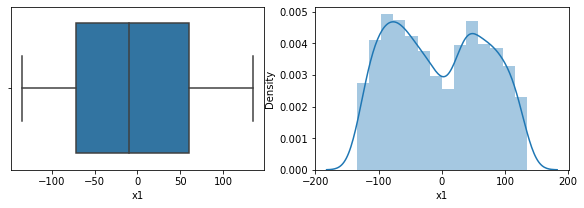

In [46]:
#EDA 
#X1
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.boxplot(df['x1'])
plt.subplot(122)
sns.distplot(df['x1'])
plt.show()

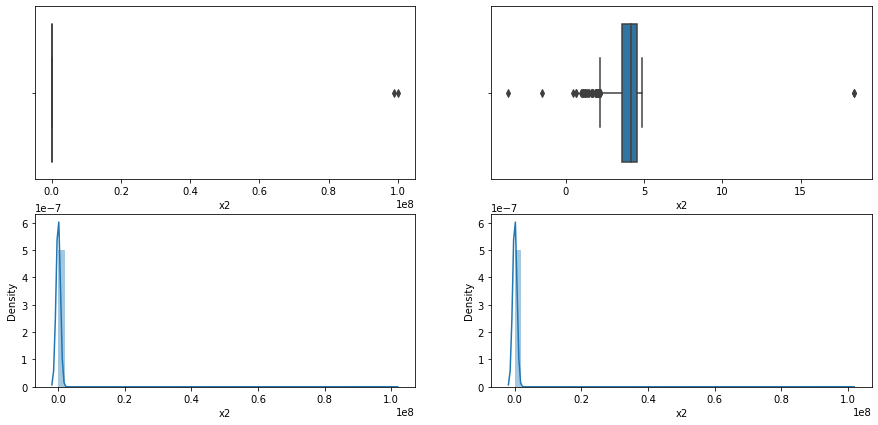

In [47]:
#EDA 
#X2
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.boxplot(df['x2'])
plt.subplot(222)
sns.boxplot(np.log(df['x2']))
plt.subplot(223)
sns.distplot(df['x2'])
plt.subplot(224)
sns.distplot(df['x2'])
plt.show()

In [48]:
df['x2_log'] = np.log(df['x2'])

<AxesSubplot:xlabel='x2_log'>

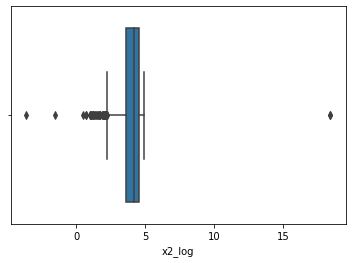

In [49]:
sns.boxplot(df['x2_log'])

<AxesSubplot:xlabel='x2_log'>

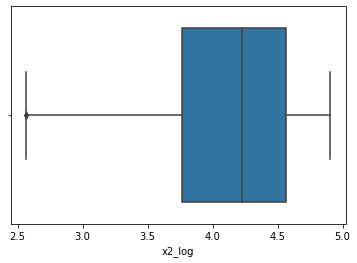

In [52]:
Q1 = df['x2_log'].quantile(0.25)
Q3 = df['x2_log'].quantile(0.75)
IQR = Q3-Q1
ll =  Q1-1.5*IQR
ul = Q3+1.5*IQR
df.drop(df[df['x2_log'] > ul ].index, inplace = True)
df.drop(df[df['x2_log'] < ll ].index, inplace = True)
sns.boxplot(df['x2_log'])

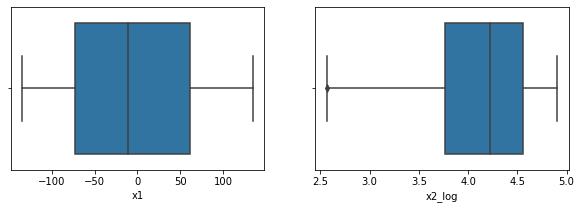

In [53]:
#EDA 
#X1
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.boxplot(df['x1'])
plt.subplot(122)
sns.boxplot(df['x2_log'])
plt.show()

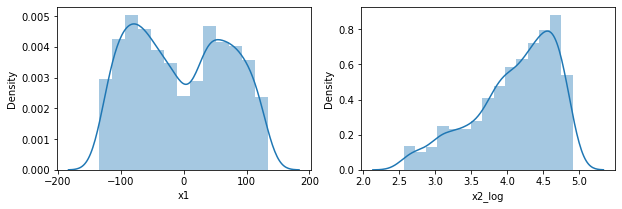

In [54]:
#EDA 
#X1
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.distplot(df['x1'])
plt.subplot(122)
sns.distplot(df['x2_log'])
plt.show()

In [55]:
df = df[['x1','x2_log','y']]
df.head(2)

,x1,x2_log,y
0,-119.366669,4.744932,1
1,-101.108044,4.582691,1


In [56]:
df['x2_log'].fillna(df['x2_log'].median(),inplace=True)
df.isnull().sum()

x1        0
x2_log    0
y         0
dtype: int64

<AxesSubplot:xlabel='x2_log', ylabel='Density'>

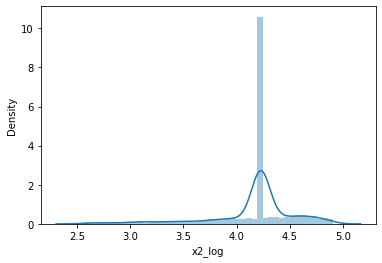

In [57]:
sns.distplot(df['x2_log'])

## Model Creation 
    1.Logistic Regression
    2.SVM with Linear Kernel
    3.SVM with RBF Kernel
    4.Decision Tree
    5.KNN


In [58]:
#Model Summary
ModelSummary = {}
k = 0

In [59]:
df.shape

(2153, 3)

In [60]:
df.head(2)

,x1,x2_log,y
0,-119.366669,4.744932,1
1,-101.108044,4.582691,1


In [61]:
df.columns

Index(['x1', 'x2_log', 'y'], dtype='object')

In [62]:
df = df[['x1','x2_log','y']]
df.head(2)

,x1,x2_log,y
0,-119.366669,4.744932,1
1,-101.108044,4.582691,1


In [63]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [64]:
df['y'].value_counts()

0    1205
1     948
Name: y, dtype: int64

In [65]:
#Libaries calling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [66]:
#Split Function
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=22,test_size=0.20)

#Logistic Classification
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('Base Model precision : ',precision_score(y_test,y_pred))
print('Standred Scaller Base recall : ',recall_score(y_test,y_pred))


#ProjectSummary
ModelName = 'Base_Logistic_Regression_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1



from sklearn.model_selection import RandomizedSearchCV
grid_params = {"C":np.logspace(-3,3,7), 
               "penalty":['l1','l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}


print("\nProcessing Best find........")
#Best parameter find-out
randm_model = RandomizedSearchCV(LogisticRegression(), param_distributions=grid_params,random_state=23, verbose =1, cv=3, n_jobs = -1)
randm_search = randm_model.fit(X_train,y_train)
grid = randm_model.best_estimator_

print("\nFound........")
print("Best Peramenter Found : ", grid)

print("\nHyperTunning Parameter Accuarcy")
#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))



#ProjectSummary
ModelName = 'Hyper_Logistic_Regression_classification'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1

Base Model Accuarcy :  57.540603248259856 %
Base Model precision :  0.6049382716049383
Standred Scaller Base recall :  0.245

Processing Best find........
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Found........
Best Peramenter Found :  LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

HyperTunning Parameter Accuarcy
After HyperTunning Model Accuarcy :  57.540603248259856 %
After HyperTunning Model precision :  0.6049382716049383
After HyperTunning Model recall :  0.245


In [67]:
ModelSummary

{0: {'ModelName': 'Base_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765},
 1: {'ModelName': 'Hyper_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765}}

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=22,test_size=0.20)

#SVM kernal Linear Classification
svmlinear = svm.SVC(kernel='linear')
svmlinear.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)
print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')


#ProjectSummary
ModelName = 'Base_SVM_K_Linear'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1



from sklearn.model_selection import RandomizedSearchCV
grid_params = {'C':np.logspace(-2,10,3),'gamma':np.logspace(-9,3,3)}

print("\nProcessing Best find........")
#Best parameter find-out
randm_model = RandomizedSearchCV(svmlinear, param_distributions=grid_params,random_state=24, verbose =1, cv=2, n_jobs = -1)
randm_search = randm_model.fit(X_train,y_train)
grid = randm_model.best_estimator_

print("\nFound........")
print("Best Peramenter Found : ", grid)

print("\nHyperTunning Parameter Accuarcy")
#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))


#ProjectSummary
ModelName = 'Hyper_SVM_K_Linear'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1


In [151]:
#SVM kernal RBF Classification
svmrbf = svm.SVC(kernel ='rbf')
svmrbf.fit(X_train,y_train)
y_pred = svmlinear.predict(X_test)
print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')


#ProjectSummary
ModelName = 'Base_SVM_K_RBF'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1


from sklearn.model_selection import RandomizedSearchCV
grid_params = {'kernel' :['linear'],"C":np.logspace(-2,10,13), "gamma":np.logspace(-9, 3, 13)}

print("\nProcessing Best find........")
#Best parameter find-out
randm_model = RandomizedSearchCV(svmlinear, param_distributions=grid_params,random_state=24, verbose =1, cv=3, n_jobs = -1)
randm_search = randm_model.fit(X_train,y_train)
grid = randm_model.best_estimator_

print("\nFound........")
print("Best Peramenter Found : ", grid)

print("\nHyperTunning Parameter Accuarcy")
#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))


#ProjectSummary
ModelName = 'Hypr_SVM_K_RBF'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1

Base Model Accuarcy :  82.5986078886311 %


In [68]:
#Decision Tree
dtreg = DecisionTreeClassifier()
dtreg.fit(X_train,y_train)
y_pred = dtreg.predict(X_test)

print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('Base Model precision : ',precision_score(y_test,y_pred))
print('Standred Scaller Base recall : ',recall_score(y_test,y_pred))

#ProjectSummary
ModelName = 'Base_Decision_Tree'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1



parameter = {'criterion': ['gini','entropy'],
            'max_depth' : [2,3,5,10,20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            }

from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameter, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train,y_train)
grid = grid_model.best_estimator_

model = grid.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('KNeighborsClassifier Model Accuracy : ', accuracy_score(y_pred,y_test)*100,'%')
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))


#ProjectSummary
ModelName = 'Hypr_Decision_Tree'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1

Base Model Accuarcy :  90.71925754060325 %
Base Model precision :  0.8921568627450981
Standred Scaller Base recall :  0.91
Fitting 3 folds for each of 10 candidates, totalling 30 fits
KNeighborsClassifier Model Accuracy :  94.43155452436194 %
[[220  13]
 [ 11 187]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       233
           1       0.94      0.94      0.94       198

    accuracy                           0.94       431
   macro avg       0.94      0.94      0.94       431
weighted avg       0.94      0.94      0.94       431



In [69]:
ModelSummary

{0: {'ModelName': 'Base_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765},
 1: {'ModelName': 'Hyper_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765},
 2: {'ModelName': 'Base_Decision_Tree',
  'ModeAccuracy': 0.9071925754060325,
  'Precision': 0.91,
  'Recall': 0.8921568627450981,
  'f1score': 0.900990099009901},
 3: {'ModelName': 'Hypr_Decision_Tree',
  'ModeAccuracy': 0.9443155452436195,
  'Precision': 0.935,
  'Recall': 0.9444444444444444,
  'f1score': 0.9396984924623116}}

In [70]:
#KNN 
knnreg = KNeighborsClassifier()
knnreg.fit(X_train,y_train)
y_pred = knnreg.predict(X_test)

print('Base Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('Base Model precision : ',precision_score(y_test,y_pred))
print('Standred Scaller Base recall : ',recall_score(y_test,y_pred))

#ProjectSummary
ModelName = 'Base_KNN'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1


grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

from sklearn.model_selection import RandomizedSearchCV
grid_model = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=grid_params, verbose =1, cv=3, n_jobs = -1)
grid_Search = grid_model.fit(X_train,y_train)
grid = grid_model.best_estimator_

print("\nFound........")
print("Best Peramenter Found : ", grid)

print("\nHyperTunning Parameter Accuarcy")
#Model with Best Parameter
grid.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('After HyperTunning Model Accuarcy : ',accuracy_score(y_test,y_pred)*100,'%')
print('After HyperTunning Model precision : ',precision_score(y_test,y_pred))
print('After HyperTunning Model recall : ',recall_score(y_test,y_pred))


#ProjectSummary
ModelName = 'Hypr_KNN'
Acc = accuracy_score(y_pred,y_test)
pres = precision_score(y_pred,y_test)
recal = recall_score(y_pred,y_test)
f1score = f1_score(y_pred,y_test)
ModelSummary[k] = {}
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModelName'] = ModelName
ModelSummary[k]['ModeAccuracy'] = Acc
ModelSummary[k]['Precision'] = pres
ModelSummary[k]['Recall'] = recal
ModelSummary[k]['f1score'] = f1score
k=k+1

Base Model Accuarcy :  61.94895591647332 %
Base Model precision :  0.6022727272727273
Standred Scaller Base recall :  0.53
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Found........
Best Peramenter Found :  KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

HyperTunning Parameter Accuarcy
After HyperTunning Model Accuarcy :  57.540603248259856 %
After HyperTunning Model precision :  0.6049382716049383
After HyperTunning Model recall :  0.245


In [71]:
ModelSummary

{0: {'ModelName': 'Base_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765},
 1: {'ModelName': 'Hyper_Logistic_Regression_classification',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.3487544483985765},
 2: {'ModelName': 'Base_Decision_Tree',
  'ModeAccuracy': 0.9071925754060325,
  'Precision': 0.91,
  'Recall': 0.8921568627450981,
  'f1score': 0.900990099009901},
 3: {'ModelName': 'Hypr_Decision_Tree',
  'ModeAccuracy': 0.9443155452436195,
  'Precision': 0.935,
  'Recall': 0.9444444444444444,
  'f1score': 0.9396984924623116},
 4: {'ModelName': 'Base_KNN',
  'ModeAccuracy': 0.6194895591647331,
  'Precision': 0.53,
  'Recall': 0.6022727272727273,
  'f1score': 0.5638297872340425},
 5: {'ModelName': 'Hypr_KNN',
  'ModeAccuracy': 0.5754060324825986,
  'Precision': 0.245,
  'Recall': 0.6049382716049383,
  'f1score': 0.348

In [72]:
ModelName,ModeAccuracy,Precision,Recall,f1score = [],[],[],[],[]
import json
sorted_json_data = json.dumps(ModelSummary, sort_keys=True)
finalJson = json.loads(sorted_json_data)
finalJson
for i in range(len(finalJson)):
    List = finalJson[str(i)]
    ModelName.append(List['ModelName'])
    ModeAccuracy.append(List['ModeAccuracy'])
    Precision.append(List['Precision'])
    Recall.append(List['Recall'])
    f1score.append(List['f1score'])
Data = pd.DataFrame()
Data['ModelName'] = ModelName
Data['ModeAccuracy'] = ModeAccuracy
Data['Precision'] = Precision
Data['Recall'] = Recall
Data['f1score'] = f1score

Data

,ModelName,ModeAccuracy,Precision,Recall,f1score
0,Base_Logistic_Regression_classification,0.575406,0.245,0.604938,0.348754
1,Hyper_Logistic_Regression_classification,0.575406,0.245,0.604938,0.348754
2,Base_Decision_Tree,0.907193,0.910,0.892157,0.900990
3,Hypr_Decision_Tree,0.944316,0.935,0.944444,0.939698
4,Base_KNN,0.619490,0.530,0.602273,0.563830
5,Hypr_KNN,0.575406,0.245,0.604938,0.348754


In [73]:
# Higher Accurate Base Model is : 
Data.sort_values('ModeAccuracy',ascending=False).head(1)

,ModelName,ModeAccuracy,Precision,Recall,f1score
3,Hypr_Decision_Tree,0.944316,0.935,0.944444,0.939698


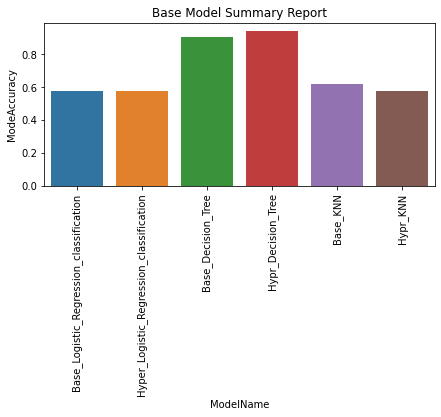

In [74]:
plt.figure(figsize=(7,3))
sns.barplot(Data['ModelName'],Data['ModeAccuracy'])
plt.title('Base Model Summary Report')
plt.xticks(rotation=90)
plt.show()

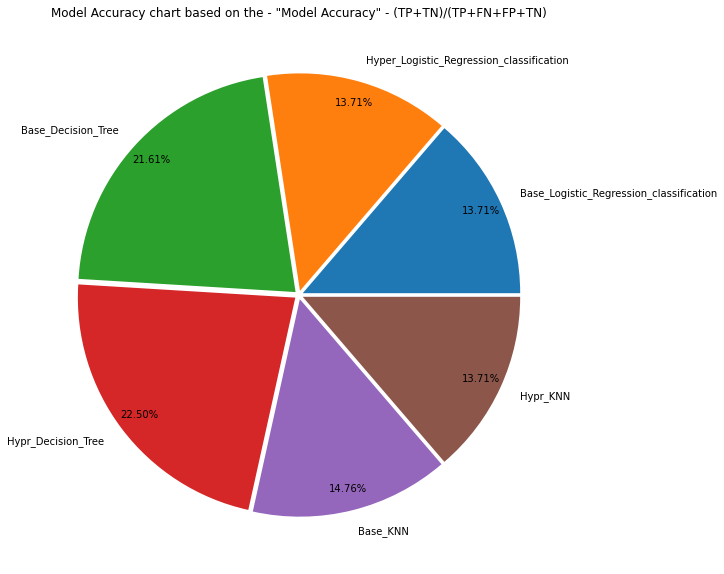

In [75]:
plt.figure(figsize=(10,10))
label = Data['ModelName'].unique()
plt.pie(Data['ModeAccuracy'],autopct="%.2f%%",labels=label,pctdistance=0.9,explode=[0.02]*6)
plt.title('Model Accuracy chart based on the - "Model Accuracy" - (TP+TN)/(TP+FN+FP+TN)')
plt.show()